Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Lukas Kaufmann | 12312127 | 21.11.2023, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 3 &ndash; Working With Datasets</h2>

<b>Authors:</b> Brandstetter, Rumetshofer, Parada-Cabaleiro, Schörgenhumer, Schäfl<br>
<b>Date:</b> 07-11-2023

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u3_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u3_utils.py</code> need to be installed.

In [132]:
# Required packages and the u3_utils file
import u3_utils as u3
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')
pd.options.display.width = 0
pd.options.display.max_colwidth = 100
u3.check_module_versions()

# Set default plotting style.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u3.setup_jupyter()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.21.5 (✓)
Installed pandas version: 1.4.4 (✓)
Installed scikit-learn version: 1.0.2 (✓)
Installed matplotlib version: 3.5.2 (✓)
Installed seaborn version: 0.11.2 (✓)


<h2>The iris dataset</h2>

Some exercises of this unit are based upon the iris dataset (already introduced in Unit 1). In the following, we recapitulate its main characteristics. 

Summarizing, the famous iris dataset contains measurements for $n=150$ iris flowers from three different classes, namely:

* Iris-setosa ($n_{se}=50$)
* Iris-versicolor ($n_{ve}=50$)
* Iris-virginica ($n_{vi}=50$).

Moreover, we have the following $d=4$ features:

* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm

<h2>Exercise 1</h2>

Given the function and datapoints (samples) defined below, perform the following task:

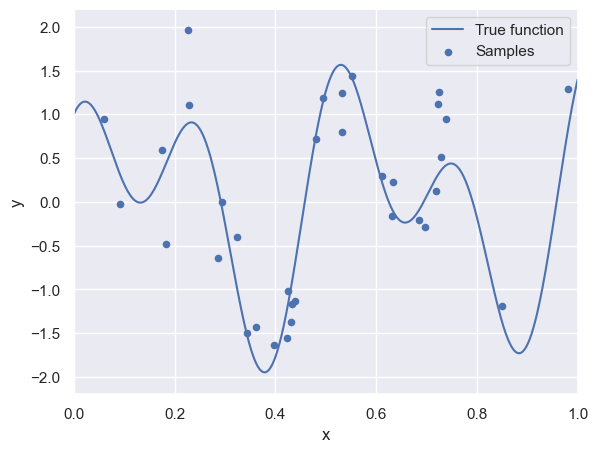

In [133]:
# function
def function(x):
    return np.sin(4.2 * np.pi * x) + np.cos(7.8 * np.pi * x)

np.random.seed(123)
n_samples = 35

# data points
x = np.random.rand(n_samples)
noise = np.random.randn(n_samples) * 0.45
y = function(x) + noise

# plot function with noise
u3.plot_function(x, y, function)

<div class="alert alert-warning">
    <b>Exercise 1.1. [5 Points]</b>
    <ul>
        <li>Try out polynomials of degrees 1, 3, 7, 23, and 51. Choose the polynomial which best fits the data points (without overfitting) and plot it with the function <code>u3.plot_polynomial_fit</code>.</li>
        <li>Hint: You should plot <b>only</b> the polynomial which best fits the datapoints, i.e., report one plot (not all five).</li>
    </ul>
</div>

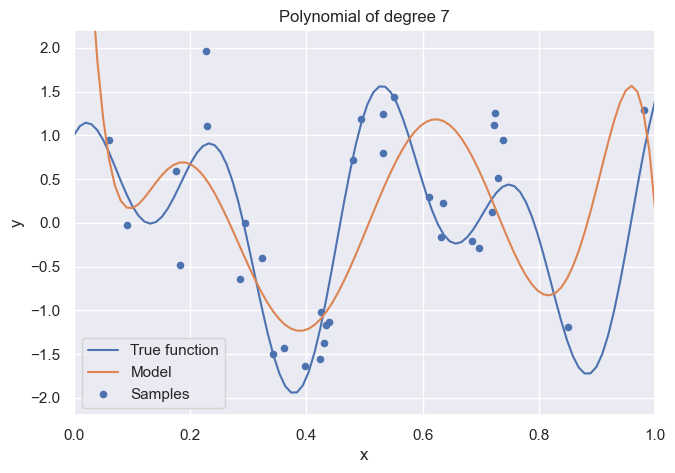

In [134]:
# your code goes here
degrees = [7]
u3.plot_polynomial_fit(x, y, function, degrees)

<h2>Exercise 2</h2>

Following the instructions given in the lecture notebook, but considering this time the iris dataset, perform the tasks below:

<div class="alert alert-warning">
    <b>Exercise 2.1. [2 Points]</b>
    <ul>
        <li>Load the iris dataset with the function <code>u3.load_iris</code> and display the data.</li>
    </ul>
</div>

In [135]:
# your code goes here
iris = u3.load_iris()
iris

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<div class="alert alert-warning">
    <b>Exercise 2.2. [7 Points]</b>
    <ul>
        <li>Separate the features from the labels by creating two variables: <code>X</code> (for the features) and <code>y</code> (for the labels). For the features, you should refer to the columns: "sepal length", "sepal width", "petal length", and "petal width" of the dataframe; for the labels, refer to the column "species".</li>
        <li>Display/Print the feature names.</li>
        <li>Hint: To easily refer to the given feature names, a straightforward solution would be indicating the exact range of columns in the dataframe we are interested in (using the <code>[:-1]</code> trick of the lecture). To be sure that you have selected the features correctly, before going ahead with the next tasks, printing the feature names is a good idea.</li>
    </ul>
</div>

In [136]:
# your code goes here
feature_names = iris.columns[:-1] 
X = iris[feature_names]  
y = iris['species']  
feature_names

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

<h2>Exercise 3</h2>

Taking into account the variables `X` and `y` as previously defined, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 3.1. [5 Points]</b>
    <ul>
        <li>Split the dataset (<code>X</code> and <code>y</code>) into training and test sets considering 62% of the data for training, 38% for test.</li>
        <li>For reproducibility, consider a <code>random_state=42</code>.</li>
    </ul>
</div>

In [137]:
# your code goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38, random_state=42)

<div class="alert alert-warning">
    <b>Exercise 3.2. [5 Points]</b>
    <ul>
        <li>Plot the features of the <b>training set</b> to visualize how the four features (already defined in the second exercise) correlate.</li>
        <li>Which feature pair seems to correlate the most for all species?</li>
    </ul>
</div>

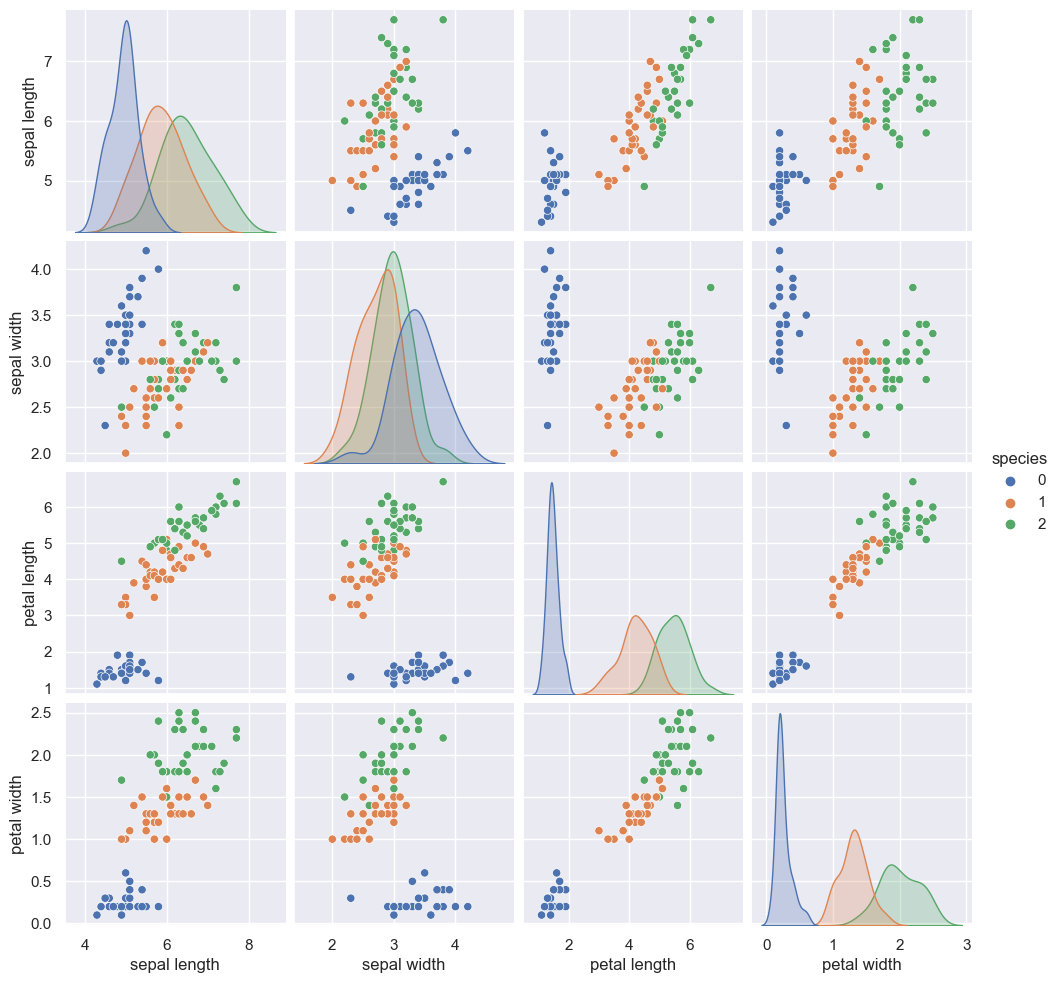

In [138]:
# your code goes here
u3.plot_features(X=X_train, y=y_train, features=feature_names)

To my mind, feature pair (petal length - petal width) seems to correlate the most for all species.

<h2>Exercise 4</h2>

Considering the data split already performed (i.e., 62% for training, 38% for test), carry out the following tasks:

<div class="alert alert-warning">
    <b>Exercise 4.1. [5 Points]</b>
    <ul>
        <li>Select a subset of only two features: "petal width" and "sepal length".</li>
        <li>Hint: Remember that the feature selection should be applied to both the training and test sets, otherwise you might get some errors in the following tasks.</li>
    </ul>
</div>

In [139]:
# your code goes here
feature_names_subset = ['petal width', 'sepal length']
X_train_subset = X_train[feature_names_subset]
X_test_subset = X_test[feature_names_subset]

<div class="alert alert-warning">
    <b>Exercise 4.2. [5 Points]</b>
    <ul>
        <li>Taking into account only the previously selected features, fit a k-nn classifier considering $k=1$, $k=5$, $k=7$, and $k=23$.</li>
        <li>For each $k$, evaluate the accuracy on the test set.</li>
        <li>Choose the $k$ which achieves the highest accuracy on the <b>test set</b> and print out the model's accuracies for <b>both</b> the training and the test sets.</li>
        <li>Hint: In case of a draw, select the $k$ with the <b>highest training accuracy</b> among the ones with the <b>highest test accuracy</b>.</li>
    </ul>
</div>

In [140]:
#evaluate accuracy for each k
k_values = [1, 5, 7, 23]
max_test = 0
max_train = 0
k_res = None
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_subset, y_train)
    print('Accuracy on test set: {:.4f}'.format(knn.score(X_test_subset, y_test)))
    print('Accuracy on training set: {:.4f}'.format(knn.score(X_train_subset, y_train)))
    if knn.score(X_test_subset, y_test) > max_test:
        max_test = knn.score(X_test_subset, y_test)
        k_res = k
    if knn.score(X_test_subset, y_test) == max_test:
        if knn.score(X_train_subset, y_train) > max_train:
            k_res = k
            max_train = knn.score(X_train_subset, y_train)
            
knn = KNeighborsClassifier(n_neighbors=k_res)
knn.fit(X_train_subset, y_train)
print(f'Result: k = {k_res}')
print('Accuracy on test set: {:.4f}'.format(knn.score(X_test_subset, y_test)))
print('Accuracy on training set: {:.4f}'.format(knn.score(X_train_subset, y_train)))
    






Accuracy on test set: 0.9474
Accuracy on training set: 0.9785
Accuracy on test set: 0.9649
Accuracy on training set: 0.9570
Accuracy on test set: 0.9649
Accuracy on training set: 0.9462
Accuracy on test set: 0.9649
Accuracy on training set: 0.9247
Result: k = 5
Accuracy on test set: 0.9649
Accuracy on training set: 0.9570


<div class="alert alert-warning">
    <b>Exercise 4.3. [5 Points]</b>
    <ul>
        <li>Plot the decision boundaries of the k-nn considering the $k$ value previously chosen.</li>
    </ul>
</div>

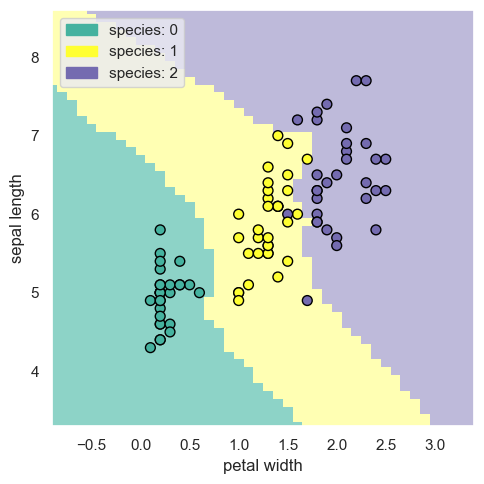

In [141]:
# your code goes here
knn.fit(X_train_subset, y_train)
knn = KNeighborsClassifier(n_neighbors=5)
u3.plot_decision_boundaries(knn, X_train, y_train, feature_names_subset)

<h2>Exercise 5</h2>

We have collected a new sample of the iris flower which presents the following characteristics: 

- petal width $=2.1$ 
- sepal length $=5.2$

Your tasks are:

<div class="alert alert-warning">
    <b>Exercise 5.1. [5 Points]</b>
    <ul>
        <li>Keeping the same model characteristics and subset of features previously defined, predict (with the already fitted model) the class of iris flower to which this new sample belongs to and print the k-nn model's prediction.</li>
        <li>Hint: The <code>predict</code> function expects a list of samples, so you have to wrap your sample again in a list: <code>[sample]</code>.</li>
    </ul>
</div>

In [142]:
# your code goes here
knn.fit(X_train_subset, y_train)
new_samples = [
    [2.1, 5.2]
]
iris_predictions = knn.predict(new_samples)

print("The k-nearest neighbors classifier predicts classes {}".format(iris_predictions))

The k-nearest neighbors classifier predicts classes [2]


<div class="alert alert-warning">
    <b>Exercise 5.2. [5 Points]</b>
    <ul>
        <li>Imagine that it is you now who is collecting new iris flowers. Can you provide two samples (represented in terms of the previously indicated features, i.e., "petal width" and "sepal length") that belong to the two remaining classes?</li>
        <li>Prove that your samples are different types of iris flower than the one new provided sample above by printing out the predictions given by the k-nn model.</li>
    </ul>
</div>

In [143]:
# your code goes here
my_samples = [
    [0.5, 5.4],
    [2.5, 6.3]
]
iris_predictions = knn.predict(my_samples)

print("The k-nearest neighbors classifier predicts classes {}".format(iris_predictions))

The k-nearest neighbors classifier predicts classes [0 2]


<h2>Exercise 6</h2>

Since the two selected features might have influenced the performance of the model, in the following tasks, different feature combinations and $k$ values will be considered in order to find the configuration which achieves the best performance.

<div class="alert alert-warning">
    <b>Exercise 6.1. [7 Points]</b>
    <ul>
        <li>Keeping the same split and <code>random_state</code> as previously (38% of the samples for test; <code>random_state=42</code>), use the function <code>u3.test_k_range()</code> to plot the accuracies obtained by the k-nn model considering every odd $k$ in an inclusive range from 1 to 21, i.e., <code>range(1, 22, 2)</code>.</li>
        <li>Concerning the features for this task, consider only the same feature pair already used in the previous tasks, i.e., "petal width" and "sepal length".</li>
    </ul>
</div>

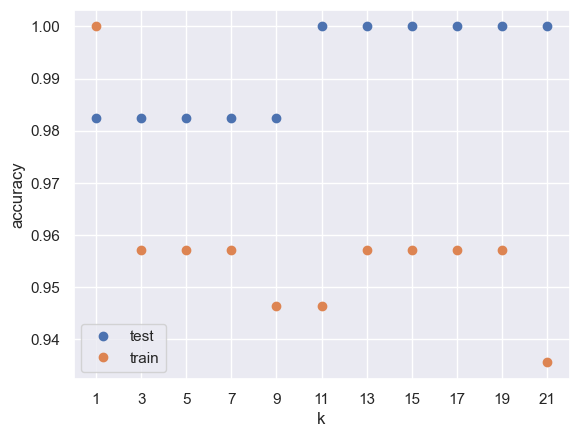

In [144]:
# your code goes here
k_range = range(1, 22, 2)
u3.test_k_range(X_train, y_train, X_test, y_test, k_range)

<div class="alert alert-warning">
    <b>Exercise 6.2. [7 Points]</b>
    <ul>
        <li>Keeping the same model configuration, plot again the accuracies for the 11 different $k$, but now, each time considering a different feature pair (e.g., "sepal width" and "petal width", "sepal width" and "petal length", etc.).</li>
        <li>Try all the possible combinations and choose the feature pair which achieves the best performance on the <b>test set</b>.</li>
        <li>In the case of more than one feature pair providing the highest accuracy, choose the combination with the <b>lowest</b> $k$.</li>
        <li>Hint: As your answer, you should plot <b>only</b> the results for this feature pair.</li>
        <li>Hint: More than one answer might be correct, meaning that you could find more than one feature pair which achieves the highest accuracy with the same $k$.</li>
        <li>Hint: There is no need to be exactly precise with the test set accuracies, just look at the plots and approximate the accuracy values.</li>
    </ul>
</div>

In [145]:
# your code goes here
feature_names_subset = ['sepal length','petal length']

X_train_subset = X_train[feature_names_subset]
X_test_subset = X_test[feature_names_subset]
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_subset, y_train)


print('Accuracy on training set: {:.4f}'.format(knn.score(X_train_subset, y_train)))
print('Accuracy on test set    : {:.4f}'.format(knn.score(X_test_subset, y_test)))

Accuracy on training set: 0.9462
Accuracy on test set    : 1.0000


<div class="alert alert-warning">
    <b>Exercise 6.3. [7 Points]</b>
    <ul>
        <li>Perform again the task just described, but this time evaluating also groups of three and four features, i.e., plot the accuracies for the 11 different $k$ considering all the possible feature combinations containing <b>three or more features</b>, and choose the feature group which reaches the highest test accuracy with the lowest $k$.</li>
    </ul>
</div>

In [146]:
# your code goes here
feature_names_subset = ['sepal length','petal length', 'petal width']

X_train_subset = X_train[feature_names_subset]
X_test_subset = X_test[feature_names_subset]
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_subset, y_train)


print('Accuracy on training set: {:.4f}'.format(knn.score(X_train_subset, y_train)))
print('Accuracy on test set    : {:.4f}'.format(knn.score(X_test_subset, y_test)))

Accuracy on training set: 0.9462
Accuracy on test set    : 1.0000


Since we have only four features, looking for the feature pair which yields the highest performance by testing each pair manually is still doable; yet, not the most practical solution. The following exercises aim to automate this process, but first, let us introduce the package `itertools`, which allows to automatically generate all the possible combinations between the elements of a list.

<h2>The ice-cream menu example</h2>

Imagine an ice-cream shop offering the following flavors:

- Vanilla
- Chocolate
- Strawberry
- Lemon

In order to satisfy every customer's wish, we want to provide an ice-cream menu containing all the possible varieties: from 1 flavor (lowest variety) to 4 flavors (highest variety), and all possible flavor combination within each variety. In the following, we will perform this by using the function `combinations` from the package `itertools`. Simply execute the cell below to see the results.

In [147]:
from itertools import combinations


# Define available flavors (for convenience, in lower case).
flavors = ['vanilla', 'chocolate', 'strawberry', 'lemon']

# We start by generating an empty menu.
icecream_menu = []

# Next, we loop through a range from 1 to 4 (inclusive) to consider all the possible varieties.
for variety in range(1, len(flavors) + 1):
    
    # - with combinations() we generate all the possible combinations given a specific variety (i.e., number of flavors)
    # - with map(list, ...) we turn each combination into a list
    # - with extend() we add to the menu the combinations (list of flavors) for each variety
    combs = map(list, combinations(flavors, variety))
    icecream_menu.extend(combs)

# Finally, we print out each ice-cream from the menu.
for icecream in icecream_menu:
    print(icecream)

['vanilla']
['chocolate']
['strawberry']
['lemon']
['vanilla', 'chocolate']
['vanilla', 'strawberry']
['vanilla', 'lemon']
['chocolate', 'strawberry']
['chocolate', 'lemon']
['strawberry', 'lemon']
['vanilla', 'chocolate', 'strawberry']
['vanilla', 'chocolate', 'lemon']
['vanilla', 'strawberry', 'lemon']
['chocolate', 'strawberry', 'lemon']
['vanilla', 'chocolate', 'strawberry', 'lemon']


<h2>Exercise 7</h2>

Considering `combinations` and the code provided above, perform the tasks described below:

<div class="alert alert-warning">
    <b>Exercise 7.1. [10 Points]</b>
    <ul>
        <li>In the following, a simple solution whose purpose is to automatically find the feature pair that achieves the highest accuracy with the lowest $k$ is given. Since some parts of the code have been removed, in order to be able to run it, your task is to complete them.</li>
        <li>Then, you can verify if your answer to the second task of Exercise 6 is correct.</li>
        <li>The following solution contains many explanatory comments aiming to describe the given code and guide you on its completion. To easily identify the missing code parts, these have been marked with asterisks as <code># ******************* #</code>.</li>
        <li>Hint: To correctly perform the feature combinations, you should take a look at the ice-cream menu example. Note that you will not need a loop over varieties in this first task, since only feature pairs will be considered (not triples, quadruples, or single features).</li>
    </ul>
</div>

In [148]:
# Define the list of features.
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Create the variable all_feature_pairs, which is a list containing all the possible feature pairs.
all_feature_pairs = []
all_feature_pairs = map(list, combinations(features, 2))

#print(all_features_pairs)

# Split X and y in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38, random_state=42)

# Define range for the evaluated k as 'k_range'.
k_range = range(1,22,2) 
#print(k_range)
# Create a list to collect the accuracies for each feature pair.
results = []

# Loop over the feature pairs.
for pair in all_feature_pairs:
    
    # Select a subset of features (for both train and test), i.e., a specific pair for each iteration of the loop.
    X_train_subset = X_train[pair]
    X_test_subset = X_test[pair]
    
    #print(pair)
    
    # Loop over the k range.
    for k in k_range: 
        
        # Define and fit the model with the number of neighbors k.
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_subset, y_train)
        
        score = knn.score(X_test_subset, y_test)
        
        # Add the evaluated feature pair, accuracy, and k as a tuple with 3 elements.
        results.append((pair, score, k))
    
# Convert the results (list of tuples) into a dataframe.
df = pd.DataFrame(results, columns=['feature pair', 'accuracy', 'k'])

# Filter the dataframe considering only the maximum accuracies.
df_max = df[df['accuracy'] == max(df['accuracy'])]

# Display the rows of the filtered dataframe whith the lowest k, (i.e., report the feature pairs which achieve the highest accuracy with the lowest k).
df_max[df_max['k'] == min(df_max['k'])]

,feature pair,accuracy,k
14,"[sepal length, petal length]",1.0,7


<div class="alert alert-warning">
    <b>Exercise 7.2. [10 Points]</b>
    <ul>
        <li>Perform the previous task (i.e., find the feature combination which yields the best score with the lowest $k$) but considering now all the possible feature combinations with <b>at least two features</b>, i.e., considering also groups of <b>three and four features</b>. As previously, by doing this, you can verify if your answer to the third task of Exercise 6 is correct.</li>
        <li>Hint: Looking at the ice-cream example, pay attention when you indicate the range, since we want to consider only combinations with at least two features.</li>
        <li>Hint: You can copy the code from Task 1 and simply make changes where necessary.</li>
    </ul>
</div>

In [149]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']


all_feature_pairs = []

for variety in range(2, len(features) + 1):
    pair_comb = map(list, combinations(features, variety))
    all_feature_pairs.extend(pair_comb)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38, random_state=42)

k_range = range(1,22,2) 
results = []

for pair in all_feature_pairs:
    
    X_train_subset = X_train[pair]
    X_test_subset = X_test[pair]
    
    for k in k_range: 
        
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(X_train_subset, y_train)
        
        score = knn.score(X_test_subset, y_test)
        
        results.append((pair, score, k))
    
df = pd.DataFrame(results, columns=['feature pair', 'accuracy', 'k'])

df_max = df[df['accuracy'] == max(df['accuracy'])]

df_max[df_max['k'] == min(df_max['k'])]

,feature pair,accuracy,k
90,"[sepal length, petal length, petal width]",1.0,5


<h2>Exercise 8</h2>

By taking again into consideration the code from exercise 7, perform the following task:

<div class="alert alert-warning">
    <b>Exercise 8.1. [10 Points]</b>
    <ul>
        <li>Using the Random Forest classifier, retrieve the feature combination which yields the best score with the lowest number of estimators. Again, evaluate all the possible feature combinations with <b>at least two features</b> and optimize the number of odd estimators between 1 and 21 (inclusive).</li>
        <li>Hint: To enable reproducibility, consider <code>random_state=42</code> as a hyper-parameter of the classifier.</li>
        <li>Hint: You can copy the code from Task 1 and simply make changes where necessary.</li>
    </ul>
</div>

In [150]:
# your code goes here

features = ['sepal length', 'sepal width', 'petal length', 'petal width']

all_feature_pairs = []

for variety in range(2, len(features) + 1):
    pair_comb = map(list, combinations(features, variety))
    all_feature_pairs.extend(pair_comb)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.38, random_state=42)
k_range = range(1,22, 2) 
results = []
for pair in all_feature_pairs:
    
    X_train_subset = X_train[pair]
    X_test_subset = X_test[pair]
    

    for k in k_range: 
        
        rfc = RandomForestClassifier(n_estimators = k, random_state = 42)
        rfc.fit(X_train_subset, y_train)
        
        score = rfc.score(X_test_subset, y_test)
    
        results.append((pair, score, k))
    df = pd.DataFrame(results, columns=['feature pair', 'accuracy', 'k'])

df_max = df[df['accuracy'] == max(df['accuracy'])]

df_max[df_max['k'] == min(df_max['k'])]




,feature pair,accuracy,k
55,"[petal length, petal width]",1.0,1
